## 7.9 Parameter Tying and Parameter sharing

* In opposition to regularizing parameters based on deviation from a specific value, we sometimes express a prior belief about certain dependencies among the parameters in our model.
    * e.g. we believe that two parameters are close to each other 
* multiple ways to incorporate such beliefs into a model

### Regularization

We impose a norm penalty penalizing for the distance between parameters $\mathbf{w}^{(a)}$, and $\mathbf{w}^{(b)}$:

$$\Omega(\mathbf{w}^{(a)}, \mathbf{w}^{(b)}) = \left\lVert \mathbf{w}^{(a)} - \mathbf{w}^{(b)} \right\rVert_2^2. $$

$\Omega$ here uses $L^2$ penalty, but other choices are possible.

### Parameter sharing 

Instead of using penalty, one can use constraints to regularize parameters to be close to each other, i.e. force a set of parameters to be equal.

Such approach is very useful e.g. in **convolutional neural networks**. An example is invariance of natural images to translation. Same parameters can be shared across multiple image locations. This allows increase in the network size without increasing the training set.

## 7.10 Sparse Representations

* Instead of placing penalties directly on the parameters, we could impose penalty on the activations in the neural networks.
    * The former ensures sparsity in the parameters, the latter sparsity of the representation.

#### Sparse parameters
<img src = 'pars.png' width = '600' height = '300'>

#### Sparse representation
<img src = 'rep.png' width = '600' height = '300'>

* Representation regularization uses same mechanisms as parameter regularization. Multiple ways to induce sparse representations.

i) Norm penalty

Adding to the loss function J a norm penalty on the representation. This penalty is denoted $\Omega(h)$. The resulting loss function:

$$\tilde{J}(\mathbf{\theta}, \mathbf{X}, \mathbf{y}) = J(\mathbf{\theta}, \mathbf{X}, \mathbf{y}) + \alpha \Omega(h),$$

where $\alpha \in [0, \infty)$ expresses the contribution of norm penalty. There are different possibilities for $\Omega(h)$.

* $L^1$ penalty: $\Omega(h) = \left\lVert \mathbf{h} \right\rVert_1 = \sum_i \mid h_i \mid$
* penalty derived from a Student-t prior on the representation
* KL divergence penalties
* strategies based on regularizing the average activation across several examples

ii) hard constraint

For example, orthogonal matching pursuit encodes an input x with the representation h that solves the constrained optimization problem

<img src = 'OMP.png' width = '200' height = '100'>
where $\left\lVert h \right\rVert_0$ is the number of non-zero entries of h.

## 7.11 Bagging and other ensemble methods

* **Model averaging** - General strategy consisting of train several different models separately, then have all of the models vote on the output for test examples.
    * Methods employing it: **ensemble methods**
If we construct an ensemble predictor from k regression models with the errors drawn from a zero-mean multivariate normal distribution with variances $E(\epsilon^2_i) = v$ and covariances $E(\epsilon_i \epsilon_j) = c$. The expected squared error of the ensemble predictor is 

$$ E [( \frac{1}{k} \sum_i \epsilon_i ) ^ 2] = \frac{1}{k} v + \frac{k-1}{k} c $$

In case the errors are perfectly correlated then the expected squared error is equal to v, if c = 0 the error decreases linearly with ensemble size. Thus, on average the ensemble will perform at least as well as any of its members, and if the members make independent errors, the ensemble will perform significantly better than its members. 

* Bagging = Bootstrap aggregating

Different ensemble methods construct the ensemble of models in different ways. **Bagging** involves constructing k different datasets. Each dataset has the same number of examples as the original dataset, but each dataset is constructed by sampling with replacement from the original dataset.

In [61]:
set <- matrix(data = 1:10, nrow = 10, ncol = 2)
bag1 <- round(runif(10, 1, 10), 0)
bag2 <- round(runif(10, 1, 10), 0)
bag3 <- round(runif(10, 1, 10), 0)
bag4 <- round(runif(10, 1, 10), 0)
bag5 <- round(runif(10, 1, 10), 0)

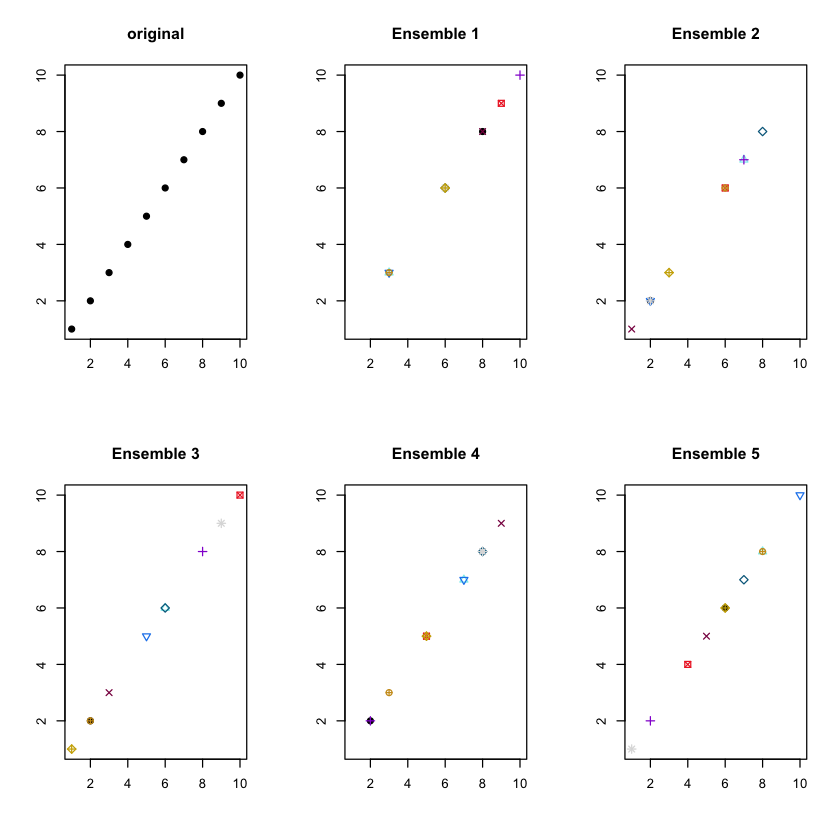

In [62]:
par(mfrow = c(2, 3))
plot(set, pch = 19, main = 'original', ylab = NA, xlab = NA)
plot(set[bag1[1]], set[bag1[1]], pch = 19, xlim = c(1, 10), ylim = c(1, 10), main = 'Ensemble 1',
     ylab = NA, xlab = NA)
for (i in 2:10){
     points(set[bag1[i]], set[bag1[i]], pch = i, col = colors()[100 + 5 * i])
    }
plot(set[bag2[1]], set[bag2[1]], pch = 19, xlim = c(1, 10), ylim = c(1, 10), main = 'Ensemble 2', 
    ylab = NA, xlab = NA)
for (i in 2:10){
     points(set[bag2[i]], set[bag2[i]], pch = i, col = colors()[100 + 5 * i])
    }
plot(set[bag3[1]], set[bag3[1]], pch = 19, xlim = c(1, 10), ylim = c(1, 10), main = 'Ensemble 3', 
    ylab = NA, xlab = NA)
for (i in 2:10){
     points(set[bag3[i]], set[bag3[i]], pch = i, col = colors()[100 + 5 * i])
    }  
plot(set[bag4[1]], set[bag4[1]], pch = 19, xlim = c(1, 10), ylim = c(1, 10), main = 'Ensemble 4',
    ylab = NA, xlab = NA)
for (i in 2:10){
     points(set[bag4[i]], set[bag4[i]], pch = i, col = colors()[100 + 5 * i])
    }
plot(set[bag5[1]], set[bag5[1]], pch = 19, xlim = c(1, 10), ylim = c(1, 10), main = 'Ensemble 5',
    ylab = NA, xlab = NA)
for (i in 2:10){
     points(set[bag5[i]], set[bag5[i]], pch = i, col = colors()[100 + 5 * i])
    }

<img src = 'cartoon.png' width = '600' height = '300'>

* NNs reach a wide variety of solution points even if models are trained on the same dataset. Differences in following properties can cause independent errors for differenc ensemble members:
    * random initialization
    * random selection of minibatches
    * differences in hyperparameters
    * different outcomes of non-deterministic implementations of neural networks

Model averaging is generally an extremely useful tool to reduce generalization error. However averaging can be costly in terms of memory, if too many models are being averaged over.

## 7.12 Dropout

* computationally inexpensive but powerful method of regularizing a broad family of models.
* approximation to training and evaluating a bagged ensemble of exponentially many neural networks.

Dropout trains the ensemble consisting of all sub-networks that can be formed by removing non-output units from an underlying base network.

<img src = 'dropout.png'  width = '600' height = '600'>

Dropout aims to approximate the bagging process, but with an exponentially large number of neural networks. To train with dropout, we use a minibatch-based learning algorithm that makes small steps, such as stochastic gradient descent. 

* Each time an example is loaded into a minibatch, we randomly sample a different binary mask to apply to all of the input and hidden units in the network. The mask are sampled independently for each unit.
    * The probability of the mask being equal to one (being included) is a hyperparameter (typically 0.8 for inputs and 0.5 for hidden units).
* Then we run forward propagation, back-propagation, and the learning update as usual.

<img src = 'proc.png'  width = '300' height = '600'>

#### Difference between bagging and dropout

* Bagging
    * Models are independent. 
    * Each of them is trained to convergence on its training set.
* Dropout
    * Models inherit different subsets of parameters from the parent network.
    * Tiny fraction of the possible sub-networks are each trained for a single step, and the parameter sharing causes the remaining sub-networks to arrive at good settings of the parameters. 

If we suppose that the model’s role is to output a probability distribution, then the bagged ensemble must accumulate votes from all models, here models produce probability distribution $p^{(i)}(y \mid \mathbf{x})$. The prediction of the ensemble is given by:

$$\frac{1}{k} \sum_{i = 1} ^ k p^{(i)}(y \mid \mathbf{x}).$$

In case of dropout each sub-model defined by mask vector $\mu$ defines a probability distribution $p(y \mid \mathbf{x, \mu})$. The probability over all masks is given by

$$ \sum_{\mu} p(\mu) p(y \mid \mathbf{x, \mu}),$$

where $p(\mu)$ is the probability distribution used to sample $\mu$. The latter is not tractable, we can obtain good performance by sampling over masks (10 - 20 may be sufficient).

A better approach, that allows us to obtain a good approximation to the predictions of the entire ensemble is using the geometric mean instead of arithmetic. To guarantee geometric mean of probability distributions is a probability distribution we require that none of the sub-models assigns probability 0 to any event. The unnormalized probability distribution is then given by

$$ \tilde{p}_{ensemble} (y \mid \mathbf{x}) = \sqrt[2^ d]{\prod_{\mu} p(y \mid \mathbf{x, \mu})},$$

where d is the number of units that may be dropped. To make predictions we must re-normalize

$$ p_{ensemble} (y \mid \mathbf{x}) = \frac{\tilde{p}_{ensemble} (y \mid \mathbf{x})}{\sum_{y'} \tilde{p}_{ensemble} (y' \mid \mathbf{x})}$$

A key insight (Hinton et al., 2012c) involved in dropout is that we can approximate $p_{ensemble}$ by evaluating $p(y \mid \mathbf{x})$ in one model: the model with all units, but with the weights going out of unit i multiplied by the probability of including unit i. This is called **weight scaling inference rule**.

### Dropout features

* computationally cheap
* does not limit the model or training procedure to be used

* The cost of applying dropout in a complex system can be significant
* When extremely few labeled training examples are available, dropout is not that effective. Outperformed by other methods.

* when applied to linear regression, dropout is equivalent to L2 weight decay, with a different weight decay coefficient for each input feature.
* Stochasticity used while training is not necessary. Fast dropout reducing the stochasticity leads to lower convergence time
* **Training a network with stochastic behavior and making predictions by averaging over multiple stochastic decisions implements a form of bagging with parameter sharing.**
    * Form of bagging creating ensembles by inclusion or exclusion of units. 
    * Other forms of random modifications are also possible.
    
Dropout trains an ensemble of models that share hidden units. Each hidden unit must learn to perform indepently of other hidden units, i.e. regardless of whether other hidden units are included or excluded. It requires hidden units to be a good feature in any context, thus presents an improvement of generalizition error in addition to ensembles or independent models.

Large portion of dropout power comes from the fact that masking noise is applied to hidden units.

## 7.13 Adversarial training

* Neural networks can reach almost human level when evaluated on an i.i.d. set. 
    * However such networks are often shown to have almost 100% error rate on examples created to be intentionally missclassified.

**Adversarial example** - a point $\mathbf{x'}$ very close to $\mathbf{x}$ that produces a very different output. The difference between $\mathbf{x'}$, and $\mathbf{x}$ could be so tiny that humans cannot tell.

* Test error rate can be reduced by **adversarial training**.

<img src = 'panda.png' width = '600' height = '300'>

* Primary cause of these adversarial examples is excessive linearity.
* Adversarial training discourages this highly sensitive locally linear behavior by encouraging the network to be locally constant in the neighborhood of the training data.

* Can also be used in semi-supervised learning. Encourage classifier to be locally constant, i.e. assign two points very close to each other to same class.

## 7.14 Tangent Distance, Tangent Prop, and Manifold Tangent Classifier

**Tangent distance algorithm** - non-parametric nearest-neighbor algorithm - does not use Euclidian distance, but knowledge of manifolds near which the probability concentrates. Invariant to the local factors of variation that correspond to movement on the manifold, therefore we want to measure distance between corresponding manifolds. We can approximate manifolds by tangent planes.

**Tangent prop algortihm** - neural net classifier with an extra penalty to make each output $f(\mathbf{x})$ of the neural net locally invariant to known factors of variation.
Achieved by requiring $\nabla_x f(\mathbf{x})$ to be orthogonal to the known manifold tangent vectors $\mathbf{v}^(i)$ at $\mathbf{x}$, or the directional derivative of f at $\mathbf{x}$ in directions $\mathbf{v}^(i)$ to be small.

Usually requires former knowledge of the effect of transformations such as translation, rotation, and scaling in images.
* closely related to dataset augmentation.
    * in both prior belive about the effect of certain transformations is expressed.

Tangent propagation is also related to **double backprop** and adversarial training . Double backprop regularizes the Jacobian to be small, while adversarial training finds inputs near the original inputs and trains the model to produce the same output on these as on the original inputs.

* Tangent prop and dataset augmentation train the model to be robust to perturbations only in certain directions, double backprop and adversarial training to perturbations in **all** directions.

**Manifold tangent classifier** eliminates the need to know the tangent vectors a priori.

(1) use an autoencoder to learn the manifold structure by unsupervised learning 

(2) use these tangents to regularize a neural net classifier as in tangent prop

<img src = 'tangent.png' width = '600' height = '300'>